# Topic 6: Labor market, wages, and unemployment

This lecture provides empirical evidence and theories of the labor market.

In [1]:
# render graphs within notebook
%matplotlib inline
# import relevant packages
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# load econutil package with some frequently used functions
import econutil as ec

Root package econutil imported.


## U.S. labor market data

U.S. labor market data from the <a href="https://fred.stlouisfed.org/">FRED database</a> at the Federal Reserve Bank of St. Louis.

### Split of total U.S. population

In [2]:
data = ec.LoadDataFRED(series=['POP','CNP16OV','CLF16OV','CE16OV','UNEMPLOY','CIVPART','EMRATIO','UNRATE'],transform='none',start = datetime.datetime(2022,1,1),end = datetime.datetime(2023,12,31))
report_date = datetime.datetime(2023,9,1)
print(f'Data for {report_date.strftime("%B %Y")}:')
print(f'Total population [POP]: {round(data["orig"]["POP"][report_date]/1000,3)} million')
print(f'Aged <16,  institutionalized, or in armed forces: {round((data["orig"]["POP"][report_date]-data["orig"]["CNP16OV"][report_date])/1000,3)} million')
print(f'Civilian non-institutional population aged 16+ [CNP16OV]: {round(data["orig"]["CNP16OV"][report_date]/1000,3)} million')
print(f'    Out of labor force: {round((data["orig"]["CNP16OV"][report_date]-data["orig"]["CLF16OV"][report_date])/1000,3)} million')
print(f'    Civilian labor force [CLF16OV]: {round(data["orig"]["CLF16OV"][report_date]/1000,3)} million')
print(f'        Employed [CE16OV]: {round(data["orig"]["CE16OV"][report_date]/1000,3)} million')
print(f'        Unemployed [UNEMPLOY]: {round(data["orig"]["UNEMPLOY"][report_date]/1000,3)} million')
print(f'Labor force participation = labor force / pop. aged 16+ [CIVPART]: {round(data["orig"]["CIVPART"][report_date],3)} %')
print(f'Employment-population ratio [EMRATIO]: {round(data["orig"]["EMRATIO"][report_date],3)} %')
print(f'Unemployment rate = unemployed / labor force [UNRATE]: {round(data["orig"]["UNRATE"][report_date],3)} %')

Data for September 2023:
Total population [POP]: 335.588 million
Aged <16,  institutionalized, or in armed forces: 68.16 million
Civilian non-institutional population aged 16+ [CNP16OV]: 267.428 million
    Out of labor force: 99.499 million
    Civilian labor force [CLF16OV]: 167.929 million
        Employed [CE16OV]: 161.57 million
        Unemployed [UNEMPLOY]: 6.36 million
Labor force participation = labor force / pop. aged 16+ [CIVPART]: 62.8 %
Employment-population ratio [EMRATIO]: 60.4 %
Unemployment rate = unemployed / labor force [UNRATE]: 3.8 %


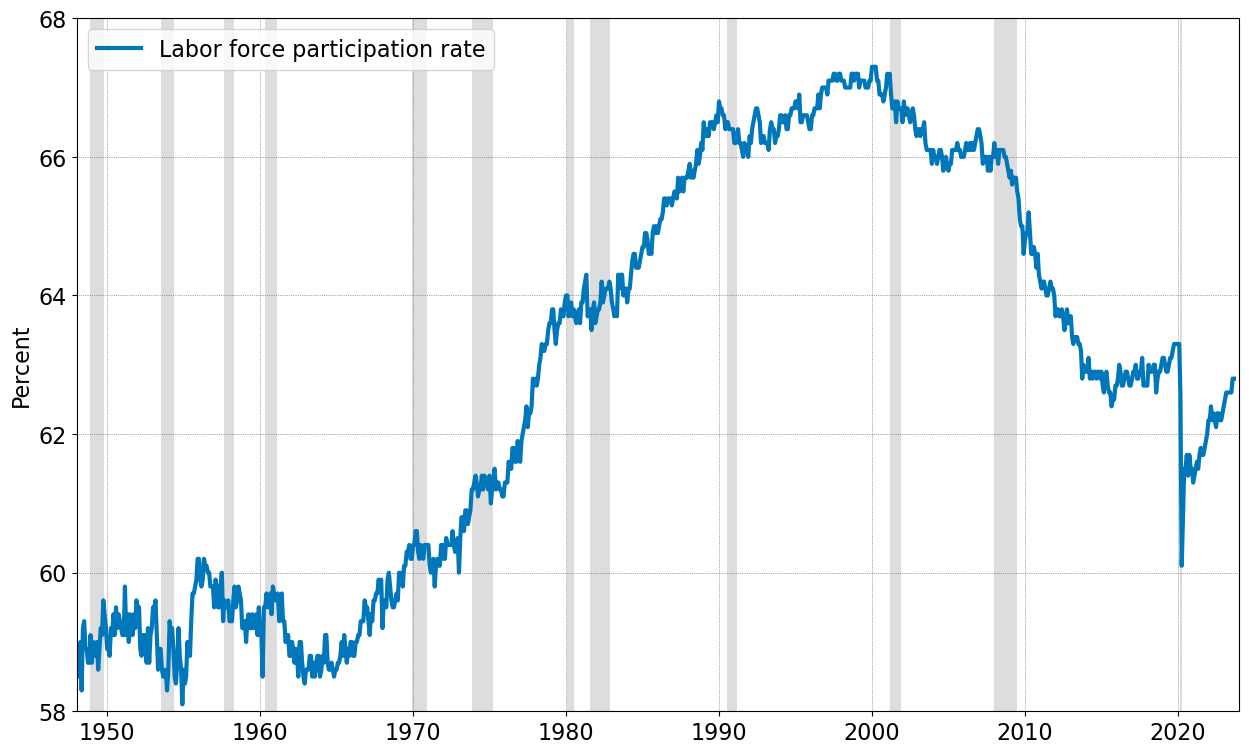

In [3]:
# labor force participation rate
data = ec.LoadDataFRED(series=['CIVPART'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1948,2024], 'ylim': [58,68],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [58,68]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['CIVPART'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Labor force participation rate')
x = ax.legend(loc='upper left')

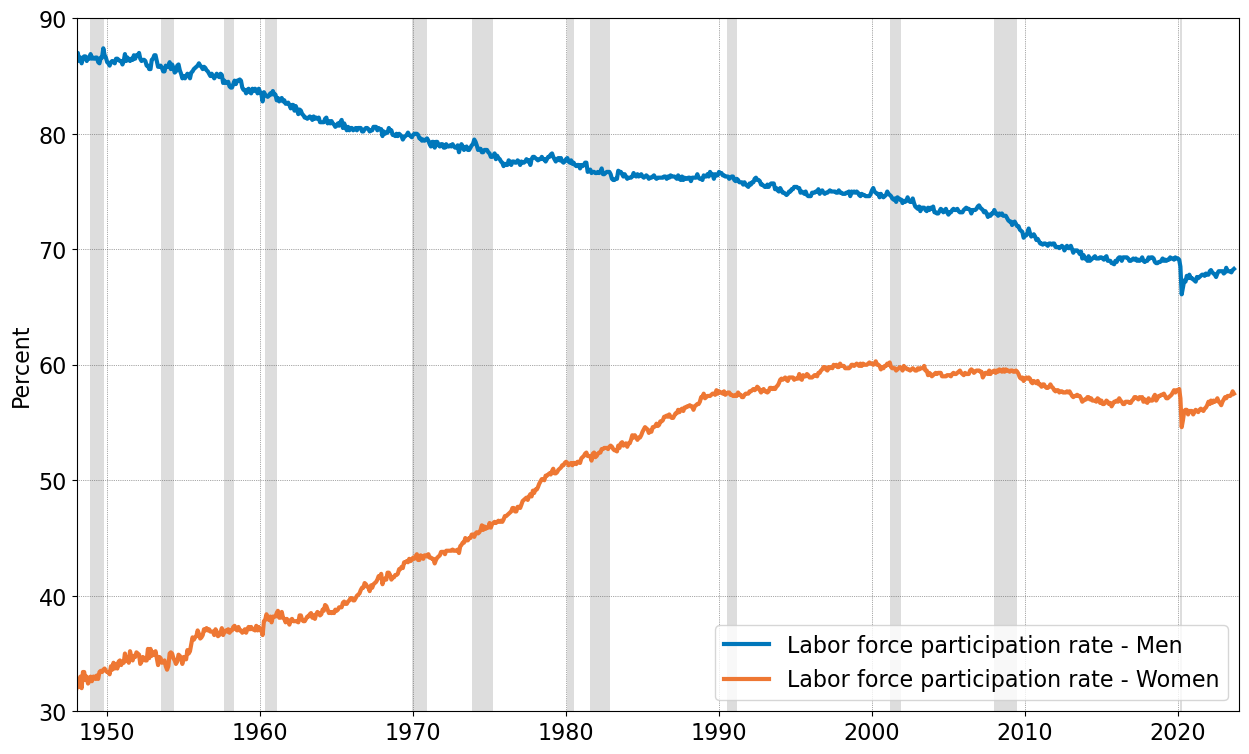

In [4]:
# labor force participation rate for men and women
data = ec.LoadDataFRED(series=['LNS11300001','LNS11300002'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1948,2024], 'ylim': [30,90],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [30,90]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['LNS11300001'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Labor force participation rate - Men')
ax.plot(data['year'],data['LNS11300002'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Labor force participation rate - Women')
x = ax.legend(loc='lower right')

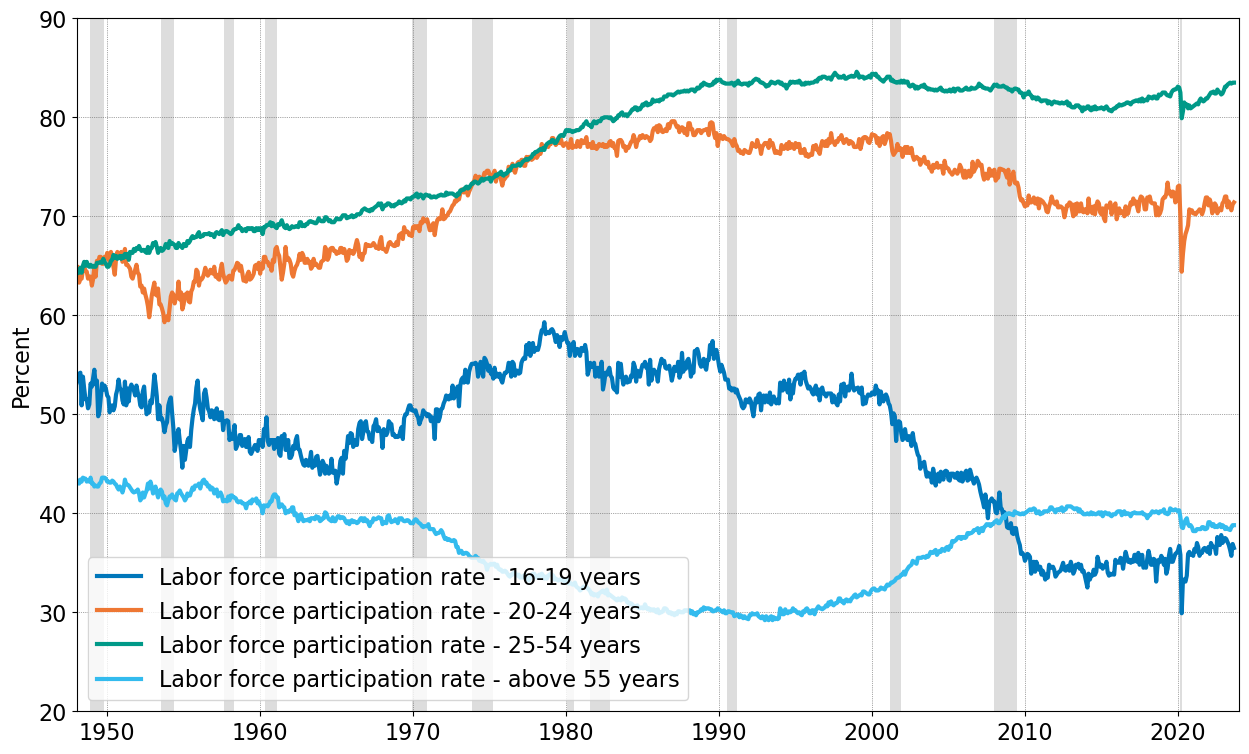

In [5]:
# labor force participation rate by age group
data = ec.LoadDataFRED(series=['LNS11300012', 'LNS11300036', 'LNS11300060', 'LNS11324230'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1948,2024], 'ylim': [20,90],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [20,90]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['LNS11300012'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Labor force participation rate - 16-19 years')
ax.plot(data['year'],data['LNS11300036'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Labor force participation rate - 20-24 years')
ax.plot(data['year'],data['LNS11300060'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantTeal'],label='Labor force participation rate - 25-54 years')
ax.plot(data['year'],data['LNS11324230'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantCyan'],label='Labor force participation rate - above 55 years')
x = ax.legend(loc='lower left')

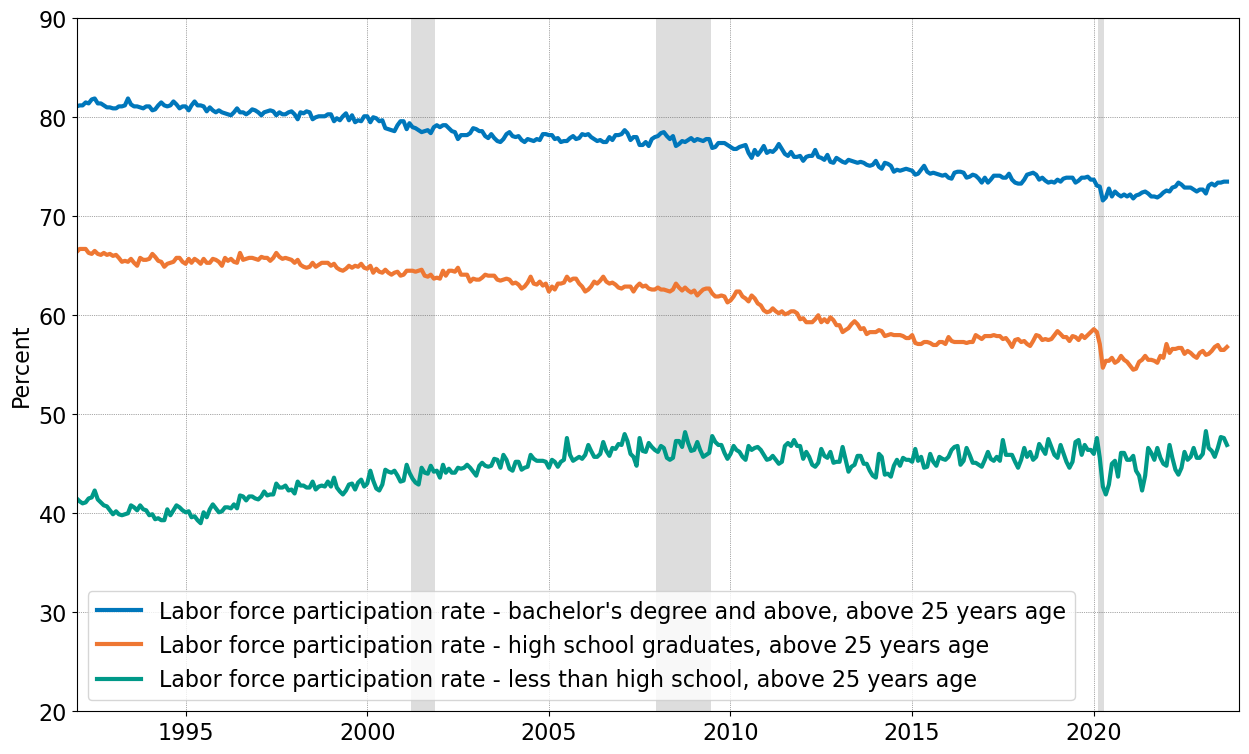

In [6]:
# labor force participation rate by education status
data = ec.LoadDataFRED(series=['LNS11327662', 'LNS11327660', 'LNS11327659'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1992,2024], 'ylim': [20,90],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [20,90]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['LNS11327662'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label="Labor force participation rate - bachelor's degree and above, above 25 years age")
ax.plot(data['year'],data['LNS11327660'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Labor force participation rate - high school graduates, above 25 years age')
ax.plot(data['year'],data['LNS11327659'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantTeal'],label='Labor force participation rate - less than high school, above 25 years age')
x = ax.legend(loc='lower left')

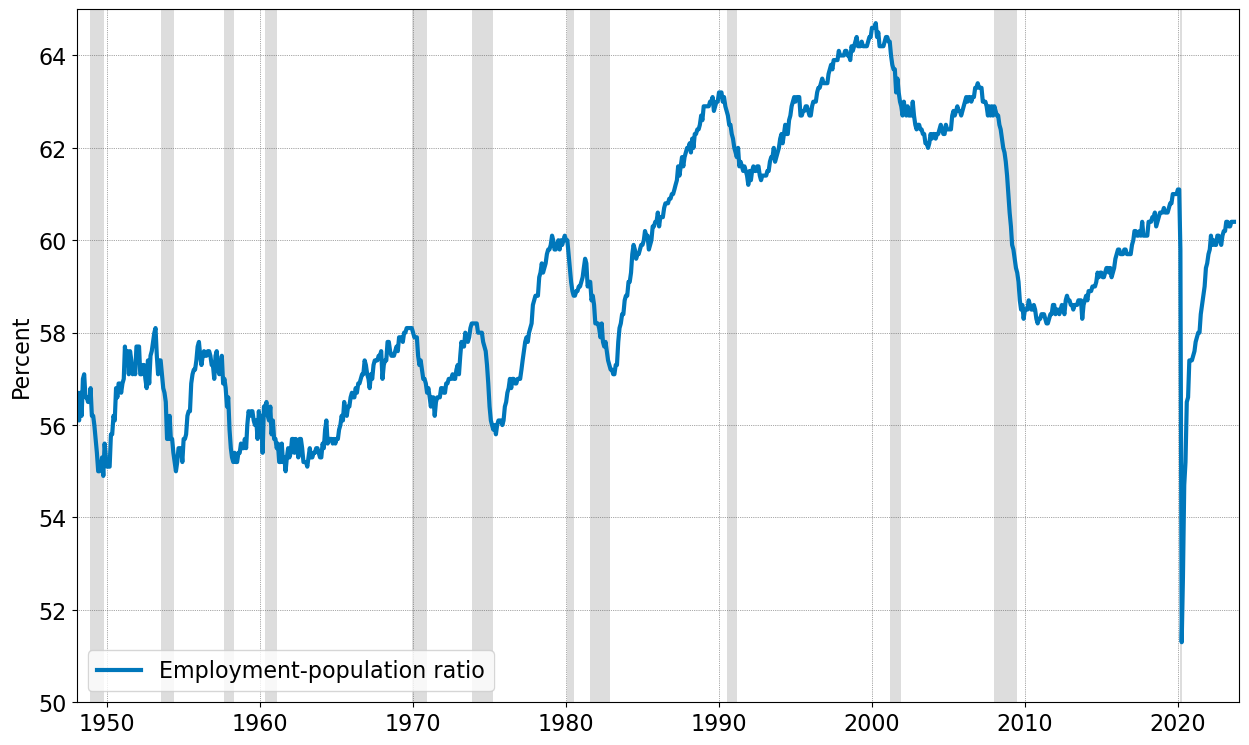

In [7]:
# employment-population ratio
data = ec.LoadDataFRED(series=['EMRATIO'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1948,2024], 'ylim': [50,65],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [50,65]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['EMRATIO'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Employment-population ratio')
x = ax.legend(loc='lower left')

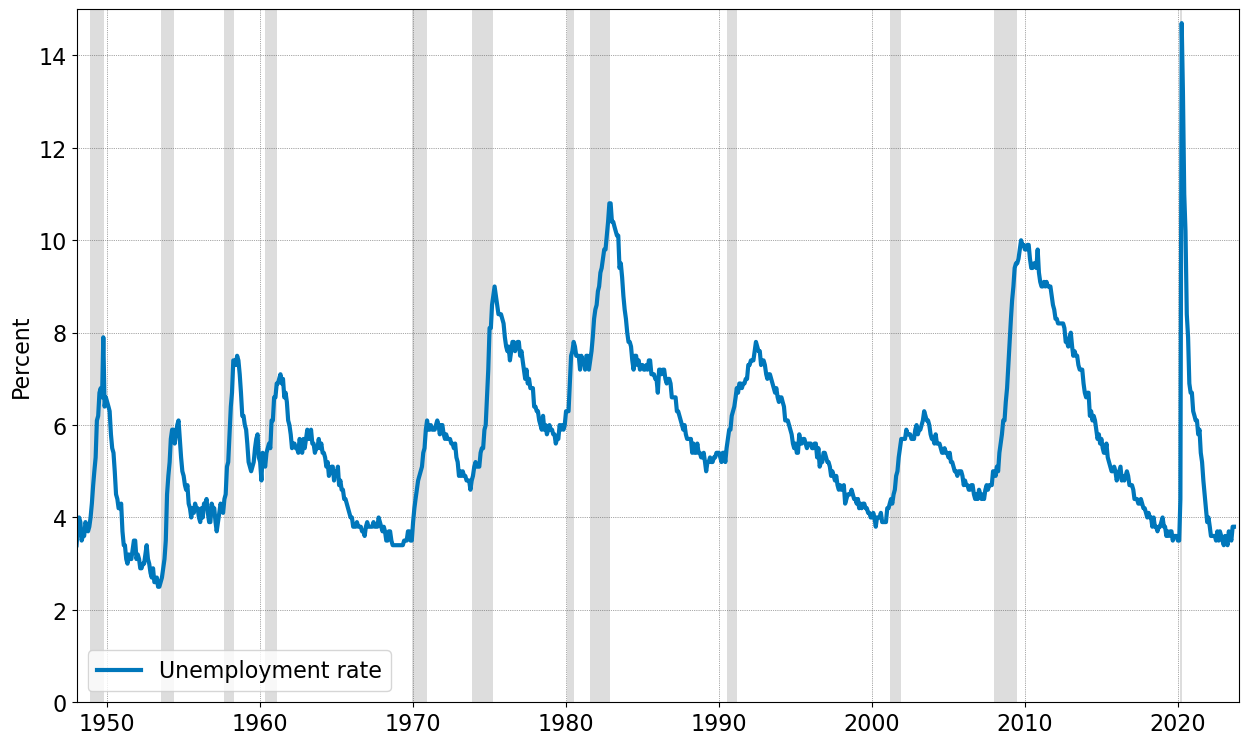

In [8]:
# unemployment rate
data = ec.LoadDataFRED(series=['UNRATE'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1948,2024], 'ylim': [0,15],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,15]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['UNRATE'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Unemployment rate')
x = ax.legend(loc='lower left')

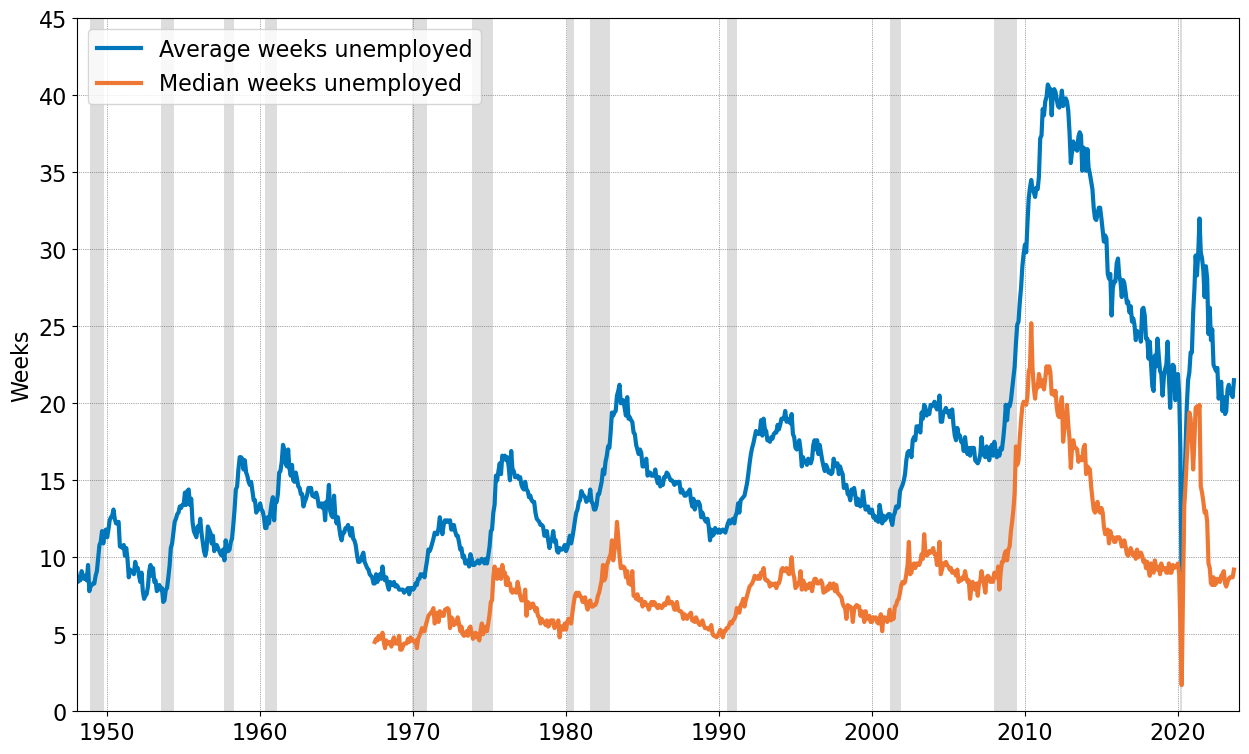

In [9]:
# unemployment spell length
data = ec.LoadDataFRED(series=['UEMPMEAN', 'UEMPMED'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1948,2024], 'ylim': [0,45],
         'xlabel': '', 'ylabel': 'Weeks',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,45]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['UEMPMEAN'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Average weeks unemployed')
ax.plot(data['year'],data['UEMPMED'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Median weeks unemployed')
x = ax.legend(loc='upper left')

## Eurostat data

In [10]:
import eurostat

In [11]:
# load data - large dataset, may load slowly
# start = datetime.datetime(1950,1,1)
# end = datetime.datetime(2030,1,1)
# data = pdr.data.DataReader('une_rt_m','eurostat',start,end)
# download the table from https://ec.europa.eu/eurostat/databrowser/view/une_rt_m/default/table?lang=en
data_Eurostat = eurostat.get_data('une_rt_m')

In [12]:
# create a dataframe for covenient processing from the downloaded data which was organized as a list
df_Eurostat = pd.DataFrame(np.transpose(data_Eurostat))
# use first column as index
df_Eurostat = df_Eurostat.set_index(0)
df_Eurostat.index.name = None
# create column names from the first four rows
df_Eurostat.columns=pd.MultiIndex.from_arrays(df_Eurostat.iloc[0:6].values)
# erase first four rows
df_Eurostat = df_Eurostat.iloc[6:]
df_Eurostat.index = pd.to_datetime(df_Eurostat.index)
# sort by year
df_Eurostat = df_Eurostat.sort_index()

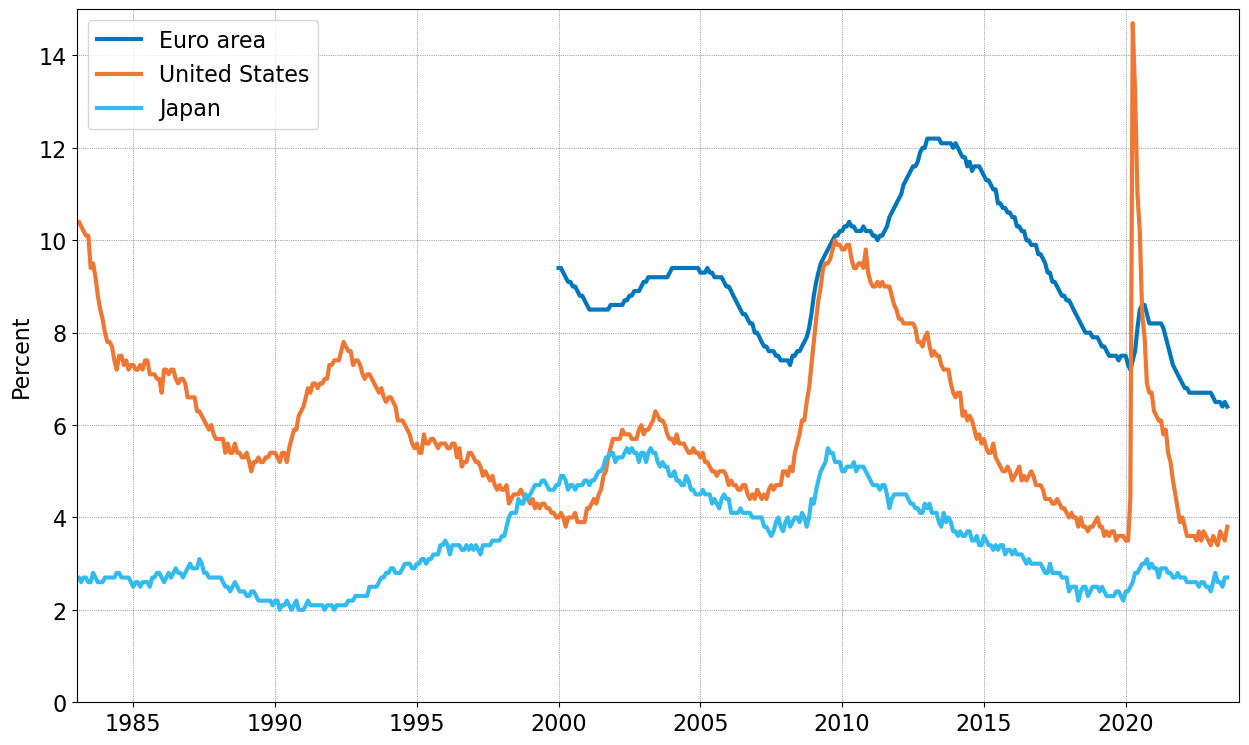

In [13]:
# process data - unemployment rates
country_list = {'Euro area':'EA20',
                'United States':'US',
                'Japan':'JP'}
d_def={}
d_def_frame = df_Eurostat.loc[:,('M','SA','TOTAL','PC_ACT','T',slice(None))]
var = ['M','SA','TOTAL','PC_ACT','T','']

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1983,2024], 'ylim': [0,15],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [0,45]}

fig,ax = ec.GenerateTSPlot(param)

for ind,i in enumerate(country_list):
    var[5] = country_list[i]
    d_def[i] = d_def_frame.loc[:,tuple(var)].to_numpy()
    #if ind == 0:
    #    ax.plot(year_frac(d_def_frame.index),d_def[i],
    #                        '--',linewidth=3,marker='',color='#000000',label=i)
    #else:
    ax.plot(ec.year_frac(d_def_frame.index),d_def[i],
                            '-',linewidth=3,marker='',color=ec.clist_vibrant[ind],label=i)
    
ax.legend(loc='upper left');

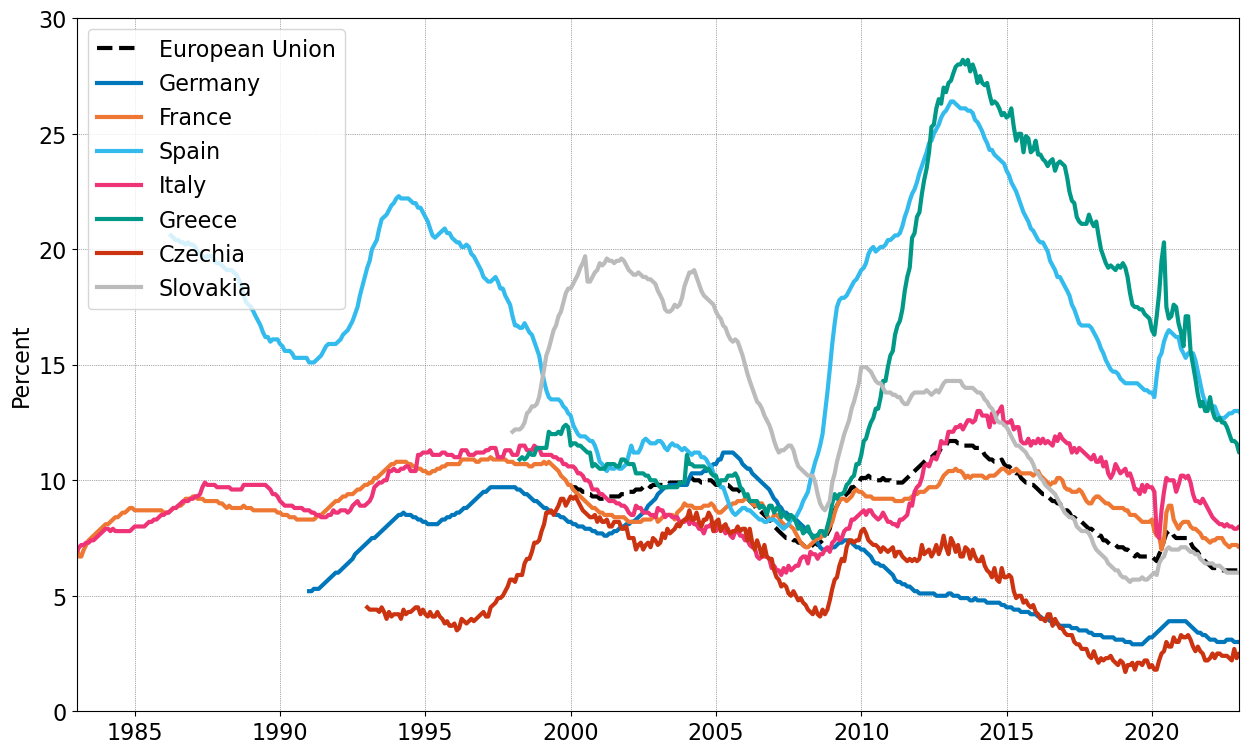

In [14]:
# process data - unemployment rates - more countries
country_list = {'European Union':'EU27_2020',
                'Germany':'DE',
                'France':'FR',
                'Spain':'ES',
                'Italy':'IT',
                'Greece':'EL',
                'Czechia':'CZ',
                'Slovakia':'SK'}
d_def={}
d_def_frame = df_Eurostat.loc[:,('M','SA','TOTAL','PC_ACT','T',slice(None))]
var = ['M','SA','TOTAL','PC_ACT','T','']

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1983,2023], 'ylim': [0,30],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [0,45]}

fig,ax = ec.GenerateTSPlot(param)

for ind,i in enumerate(country_list):
    var[5] = country_list[i]
    d_def[i] = d_def_frame.loc[:,tuple(var)].to_numpy()
    if ind == 0:
        ax.plot(ec.year_frac(d_def_frame.index),d_def[i],
                            '--',linewidth=3,marker='',color='#000000',label=i)
    else:
        ax.plot(ec.year_frac(d_def_frame.index),d_def[i],
                            '-',linewidth=3,marker='',color=ec.clist_vibrant[ind-1],label=i)
    
ax.legend(loc='upper left');

## Worker flows and Beveridge curve

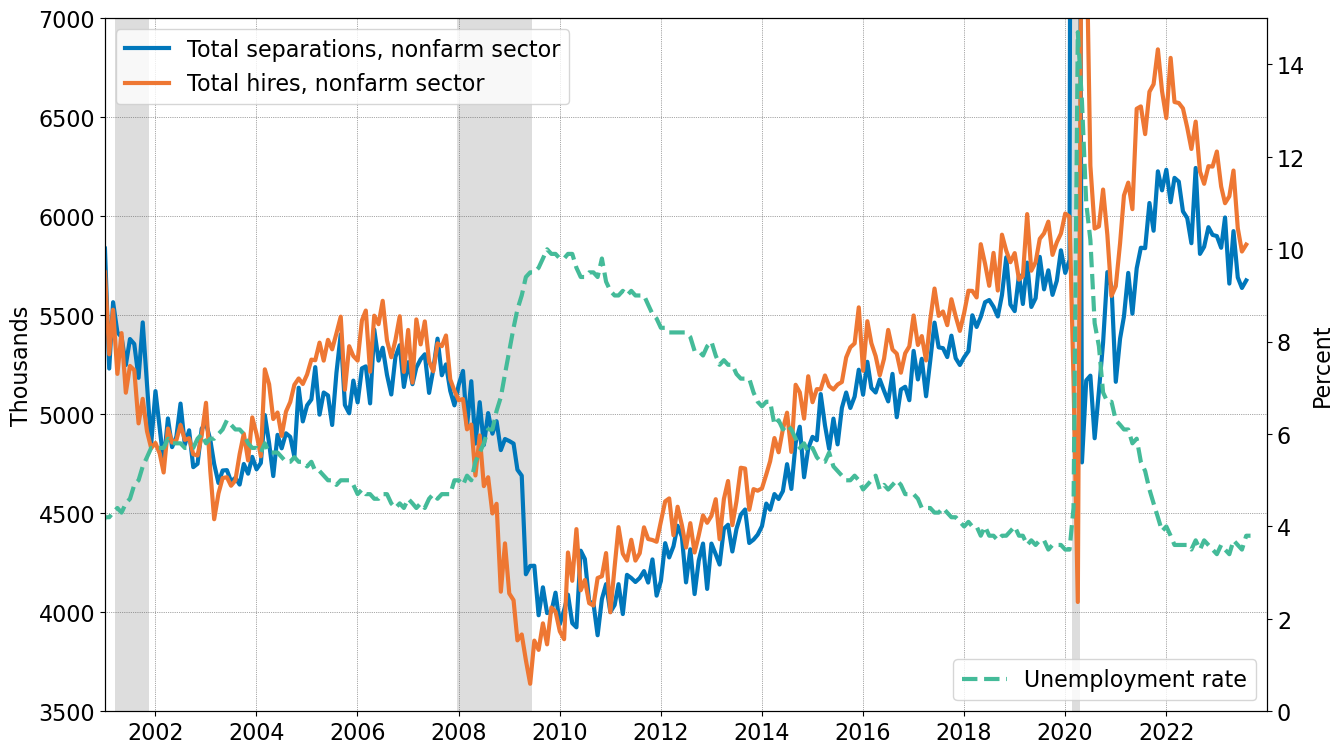

In [15]:
# hires and separations
data = ec.LoadDataFRED(series=['JTSTSL', 'JTSHIL', 'UNRATE'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [2001,2024], 'ylim': [3500,7000],
         'xlabel': '', 'ylabel': 'Thousands',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [1000,7000]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['JTSTSL'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Total separations, nonfarm sector')
ax.plot(data['year'],data['JTSHIL'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Total hires, nonfarm sector')
ax.set_xticks(np.linspace(2002,2022,11))
x = ax.legend(loc='upper left')


# add right axis with epidemic data
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(data['year'],data['UNRATE'],
                    linewidth=3,marker='',linestyle='--',color=ec.tolColor['tolLightMint'],label='Unemployment rate')
ax2.set_ylim([0,15])
ax2.set_ylabel('Percent')
x = ax2.legend(loc='lower right')

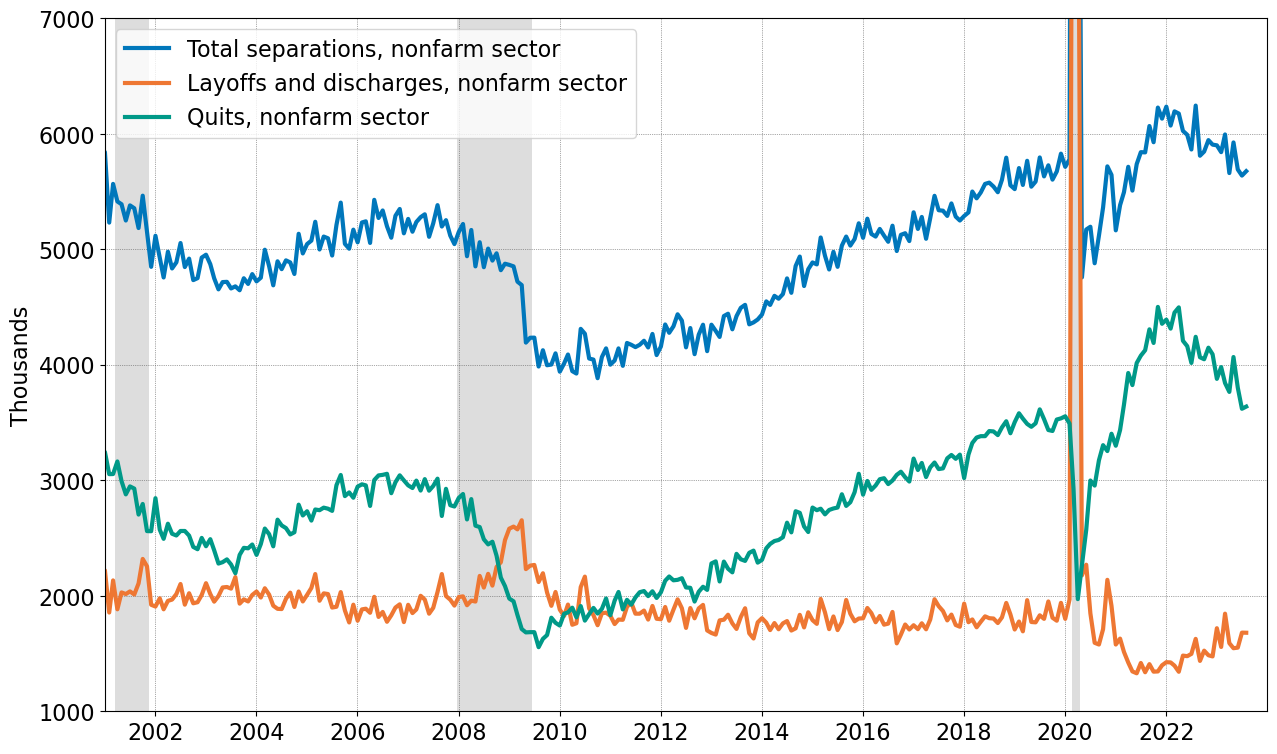

In [16]:
# hires and separations
data = ec.LoadDataFRED(series=['JTSTSL', 'JTSLDL', 'JTSQUL'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [2001,2024], 'ylim': [1000,7000],
         'xlabel': '', 'ylabel': 'Thousands',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [1000,7000]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['JTSTSL'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Total separations, nonfarm sector')
ax.plot(data['year'],data['JTSLDL'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Layoffs and discharges, nonfarm sector')
ax.plot(data['year'],data['JTSQUL'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantTeal'],label='Quits, nonfarm sector')
ax.set_xticks(np.linspace(2002,2022,11))
x = ax.legend(loc='upper left')

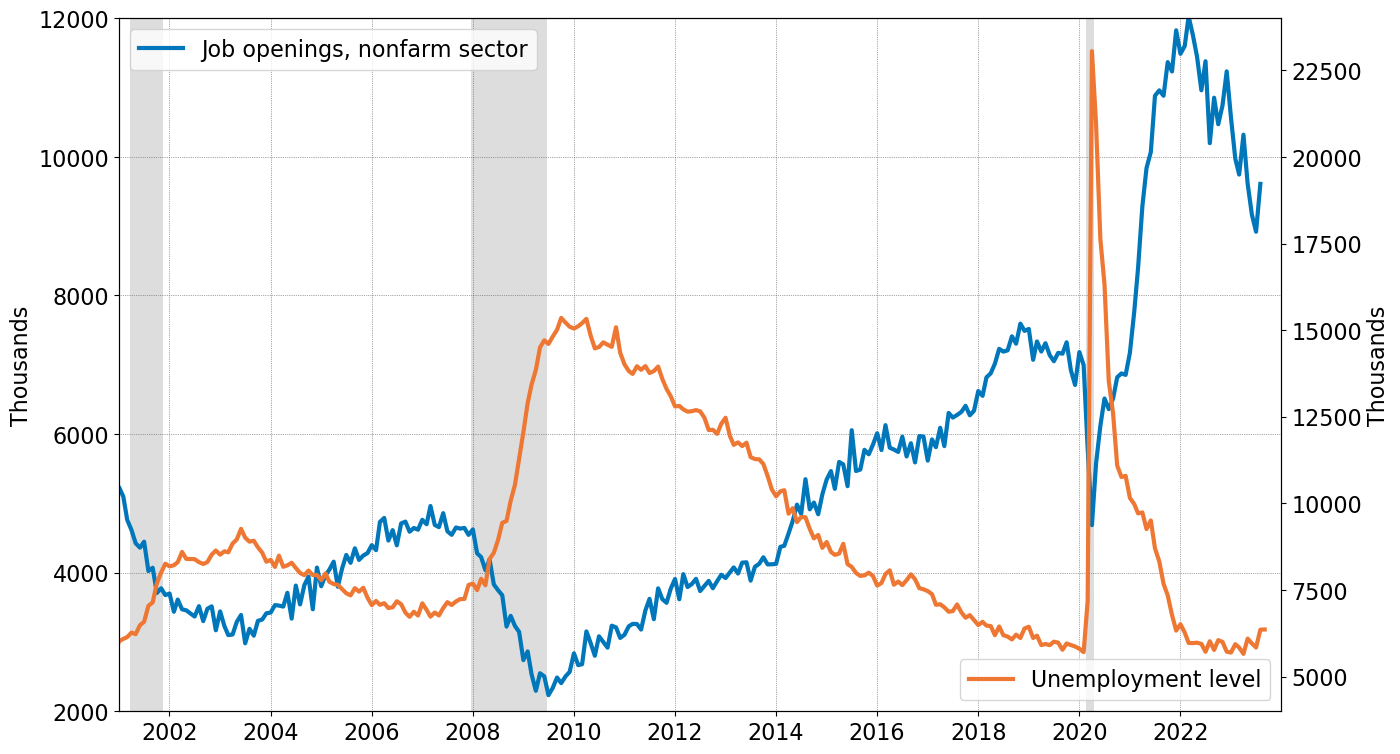

In [17]:
# hires and separations
data = ec.LoadDataFRED(series=['JTSJOL', 'UNEMPLOY'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [2001,2024], 'ylim': [2000,12000],
         'xlabel': '', 'ylabel': 'Thousands',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [2000,12000]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['JTSJOL'],
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Job openings, nonfarm sector')
ax.set_xticks(np.linspace(2002,2022,11))
x = ax.legend(loc='upper left')


# add right axis with epidemic data
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(data['year'],data['UNEMPLOY'],
                    linewidth=3,marker='',linestyle='-',color=ec.tolColor['tolVibrantOrange'],label='Unemployment level')
ax2.set_ylim([4000,24000])
ax2.set_ylabel('Thousands')
x = ax2.legend(loc='lower right')

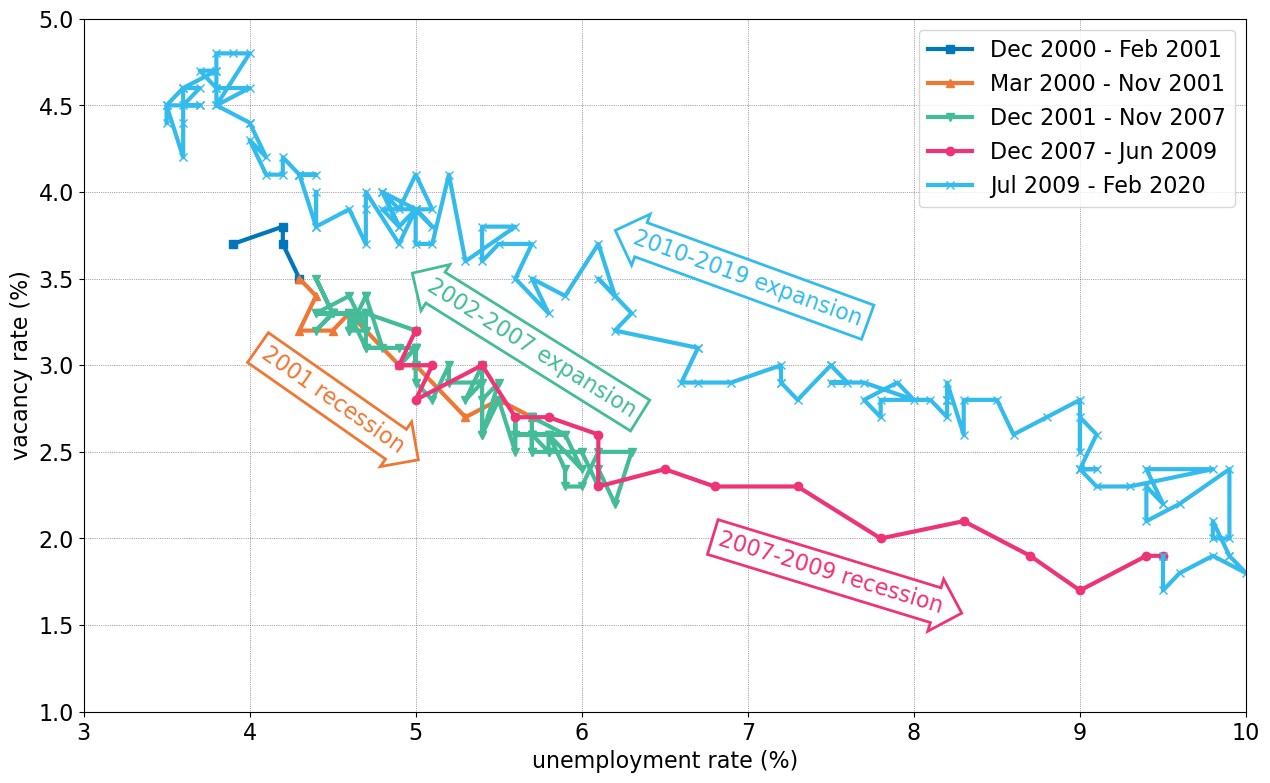

In [18]:
# Beveridge curve
data = ec.LoadDataFRED(series=['UNRATE','JTSJOR'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [3,10], 'ylim': [1,5],
         'xlabel': 'unemployment rate (%)', 'ylabel': 'vacancy rate (%)',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [2000,12000]}

fig,ax = ec.GenerateTSPlot(param)

d = np.logical_and(data['year']>2000,data['year']<2001+2.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='s',color=ec.tolColor['tolVibrantBlue'],label='Dec 2000 - Feb 2001')

d = np.logical_and(data['year']>=2001+1.5/12,data['year']<2001+11.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='^',color=ec.tolColor['tolVibrantOrange'],label='Mar 2000 - Nov 2001')
ax.annotate('2001 recession',xy=(4.5,2.8),xycoords='data',
            rotation=-35,color=ec.tolColor['tolVibrantOrange'],
            bbox=dict(boxstyle="rarrow,pad=0.3", edgecolor=ec.tolColor['tolVibrantOrange'], facecolor=ec.tolColor['tolHighContrastWhite'], linewidth=2),
            horizontalalignment='center', verticalalignment='center')

d = np.logical_and(data['year']>2001+10.5/12,data['year']<2007+11.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='v',color=ec.tolColor['tolLightMint'],label='Dec 2001 - Nov 2007')
ax.annotate('2002-2007 expansion',xy=(5.7,3.1),xycoords='data',
            rotation=-32,color=ec.tolColor['tolLightMint'],
            bbox=dict(boxstyle="larrow,pad=0.3", edgecolor=ec.tolColor['tolLightMint'], facecolor=ec.tolColor['tolHighContrastWhite'], linewidth=2),
            horizontalalignment='center', verticalalignment='center')

d = np.logical_and(data['year']>2007+10.5/12,data['year']<2009+5.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='o',color=ec.tolColor['tolVibrantMagenta'],label='Dec 2007 - Jun 2009')
ax.annotate('2007-2009 recession',xy=(7.5,1.8),xycoords='data',
            rotation=-17,color=ec.tolColor['tolVibrantMagenta'],
            bbox=dict(boxstyle="rarrow,pad=0.3", edgecolor=ec.tolColor['tolVibrantMagenta'], facecolor=ec.tolColor['tolHighContrastWhite'], linewidth=2),
            horizontalalignment='center', verticalalignment='center')

d = np.logical_and(data['year']>2009+4.5/12,data['year']<2020+1.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='x',color=ec.tolColor['tolVibrantCyan'],label='Jul 2009 - Feb 2020')
ax.annotate('2010-2019 expansion',xy=(7,3.5),xycoords='data',
            rotation=-20,color=ec.tolColor['tolVibrantCyan'],
            bbox=dict(boxstyle="larrow,pad=0.3", edgecolor=ec.tolColor['tolVibrantCyan'], facecolor=ec.tolColor['tolHighContrastWhite'], linewidth=2),
            horizontalalignment='center', verticalalignment='center')

x = ax.legend(loc='upper right')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=ec.tolColor['tolHighContrastWhite'], edgecolor=ec.tolColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=ec.tolColor['tolVibrantRed'],facecolor=ec.tolColor['tolVibrantRed'], shrink=0.05))

#ax.annotate('2001 recession',
#            xy=(5.5,2),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
#            xytext=(4,3), textcoords='data',# box position, alternative textcoords is 'axes fraction'
#            horizontalalignment='right', verticalalignment='bottom',
#            **style)



Data until September 2023.


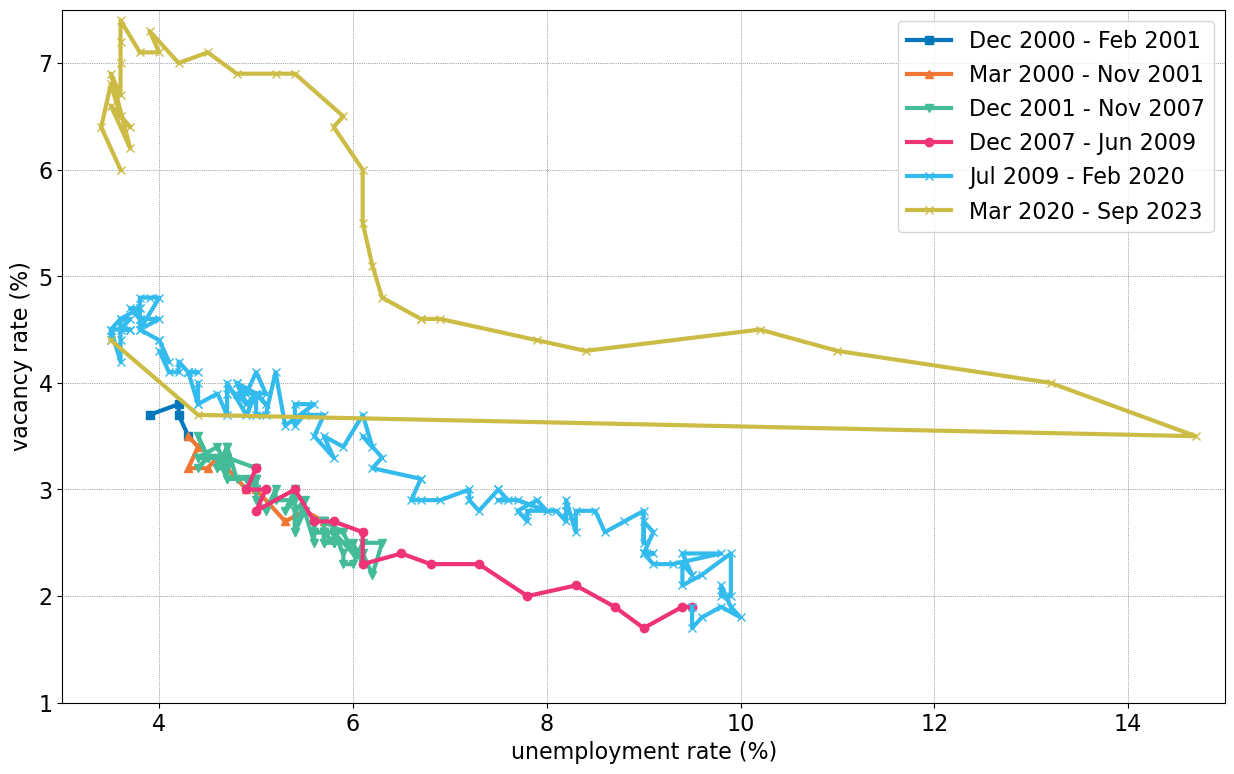

In [19]:
# Beveridge curve, including covid
data = ec.LoadDataFRED(series=['UNRATE','JTSJOR'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [3,15], 'ylim': [1,7.5],
         'xlabel': 'unemployment rate (%)', 'ylabel': 'vacancy rate (%)',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [2000,12000]}

fig,ax = ec.GenerateTSPlot(param)

d = np.logical_and(data['year']>2000,data['year']<2001+2.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='s',color=ec.tolColor['tolVibrantBlue'],label='Dec 2000 - Feb 2001')
d = np.logical_and(data['year']>=2001+1.5/12,data['year']<2001+11.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='^',color=ec.tolColor['tolVibrantOrange'],label='Mar 2000 - Nov 2001')
d = np.logical_and(data['year']>2001+10.5/12,data['year']<2007+11.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='v',color=ec.tolColor['tolLightMint'],label='Dec 2001 - Nov 2007')
d = np.logical_and(data['year']>2007+10.5/12,data['year']<2009+5.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='o',color=ec.tolColor['tolVibrantMagenta'],label='Dec 2007 - Jun 2009')
d = np.logical_and(data['year']>2009+4.5/12,data['year']<2020+1.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='x',color=ec.tolColor['tolVibrantCyan'],label='Jul 2009 - Feb 2020')
d = np.logical_and(data['year']>2020+0.5/12,data['year']<2023+1.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='x',color=ec.tolColor['tolBrightYellow'],label='Mar 2020 - Sep 2023')

x = ax.legend(loc='upper right')
print(f'Data until {data["orig"].index[-1].strftime("%B %Y")}.')

## Model of redistribution

Text(1, 0.3, 'No redistribution')

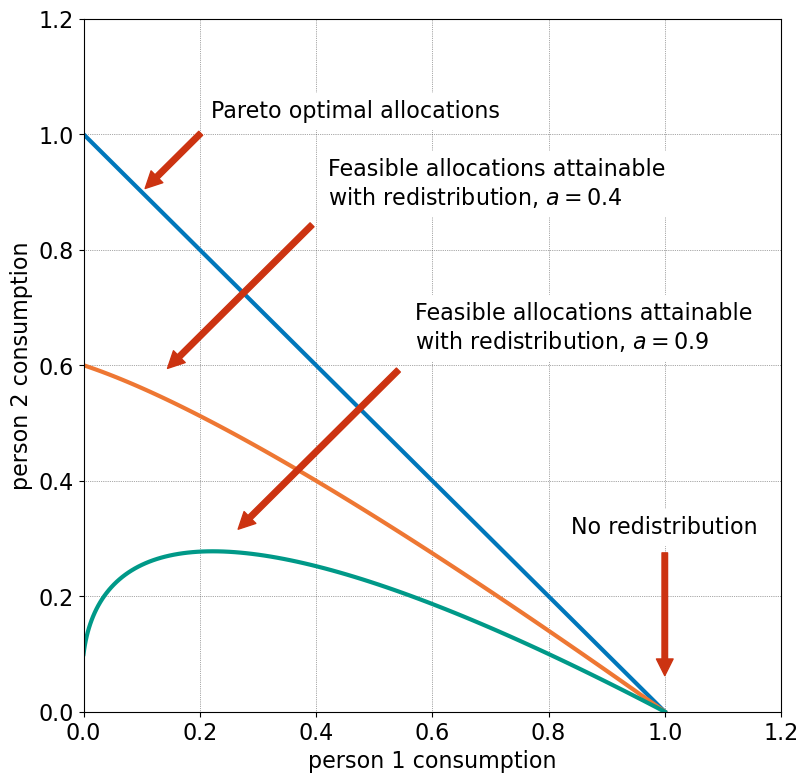

In [20]:
param = {'figsize' : [9,9], 'fontsize': 16,
         'title': '',
         'xlim': [0,1.2], 'ylim': [0,1.2],
         'xlabel': 'person 1 consumption', 'ylabel': 'person 2 consumption',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [2000,12000]}

fig,ax = ec.GenerateTSPlot(param)

τ = np.linspace(0,1,100)

a = 0
ax.plot((1-τ)*(1-a*τ),τ*(1-a*τ),linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label=f'a = {a}')
a = 0.4
ax.plot((1-τ)*(1-a*τ),τ*(1-a*τ),linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label=f'a = {a}')
a = 0.9
ax.plot((1-τ)*(1-a*τ),τ*(1-a*τ),linewidth=3,marker='',color=ec.tolColor['tolVibrantTeal'],label=f'a = {a}')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=ec.tolColor['tolHighContrastWhite'], edgecolor=ec.tolColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=ec.tolColor['tolVibrantRed'],facecolor=ec.tolColor['tolVibrantRed'], shrink=0.05))

ax.annotate('Pareto optimal allocations',
            xy=(0.1,0.9),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(0.22, 1.02), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='bottom',
            **style)

ax.annotate('Feasible allocations attainable\nwith redistribution, $a = 0.4$',
            xy=(0.13,0.58),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(0.42, 0.87), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='bottom',
            **style)

ax.annotate('Feasible allocations attainable\nwith redistribution, $a = 0.9$',
            xy=(0.25,0.3),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(0.57, 0.62), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='bottom',
            **style)

ax.annotate('No redistribution',
            xy=(1,0.05),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(1, 0.3), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)

#x = ax.legend(loc='lower left')

## Inequality data from World Inequality Database

In [21]:
# load U.S. data from WID
data_ineq_US_meta = pd.read_csv('data/WID_metadata_US.csv', delimiter=';')
data_ineq_US = pd.read_csv('data/WID_data_US.csv', delimiter=';')

In [22]:
# for variable definition, see WID_metadata_US.csv and README.md and https://wid.world/methodology/

# pre-tax factor income, capital and labor, excluding capital gains
pre_tax_factor_income_share = data_ineq_US[data_ineq_US['variable'] == 'sfaincj992']
# after-tax national income, incl. pensions and net transfers
post_tax_nat_income_share = data_ineq_US[data_ineq_US['variable'] == 'sdiincj992'] 
print(f'Years: {post_tax_nat_income_share["year"].min()}-{post_tax_nat_income_share["year"].max()}')
print(f'Available percentiles: {post_tax_nat_income_share["percentile"].unique()}')

Years: 1913-2021
Available percentiles: ['p0p1' 'p0p10' 'p0p100' 'p0p50' 'p0p90' 'p0p99' 'p10p100' 'p10p11'
 'p10p20' 'p11p100' 'p11p12' 'p12p100' 'p12p13' 'p13p100' 'p13p14'
 'p14p100' 'p14p15' 'p15p100' 'p16p100' 'p16p17' 'p17p100' 'p17p18'
 'p18p100' 'p18p19' 'p19p100' 'p19p20' 'p1p100' 'p1p2' 'p20p100' 'p20p21'
 'p20p30' 'p21p100' 'p21p22' 'p22p100' 'p22p23' 'p23p100' 'p23p24'
 'p24p100' 'p24p25' 'p25p100' 'p25p26' 'p26p100' 'p27p100' 'p27p28'
 'p28p100' 'p28p29' 'p29p100' 'p29p30' 'p2p100' 'p2p3' 'p30p100' 'p30p31'
 'p30p40' 'p31p100' 'p31p32' 'p32p100' 'p32p33' 'p33p100' 'p33p34'
 'p34p100' 'p34p35' 'p35p100' 'p35p36' 'p36p100' 'p36p37' 'p37p100'
 'p37p38' 'p38p100' 'p38p39' 'p39p100' 'p39p40' 'p3p100' 'p40p100'
 'p40p41' 'p40p50' 'p41p100' 'p41p42' 'p42p100' 'p42p43' 'p43p100'
 'p43p44' 'p44p100' 'p44p45' 'p45p100' 'p45p46' 'p46p100' 'p46p47'
 'p47p100' 'p47p48' 'p48p100' 'p48p49' 'p49p100' 'p49p50' 'p4p100'
 'p50p100' 'p50p51' 'p50p60' 'p50p90' 'p51p100' 'p51p52' 'p52p100'
 'p5

In [23]:
pre_tax_share_9999 = pre_tax_factor_income_share [pre_tax_factor_income_share ['percentile'] == 'p99.99p100']
pre_tax_share_99 = pre_tax_factor_income_share [pre_tax_factor_income_share ['percentile'] == 'p99p100']

post_tax_share_9999 = post_tax_nat_income_share [post_tax_nat_income_share ['percentile'] == 'p99.99p100']
post_tax_share_99 = post_tax_nat_income_share [post_tax_nat_income_share ['percentile'] == 'p99p100']

### Pre-tax income shares

Share: p0p90, years 1913-2021 
Share: p95p100, years 1913-2021 
Share: p99p100, years 1913-2021 
Share: p99.5p100, years 1913-2021 
Share: p99.9p100, years 1913-2021 
Share: p99.99p100, years 1913-2021 
Share: p99.99p100, years 1913-2021 


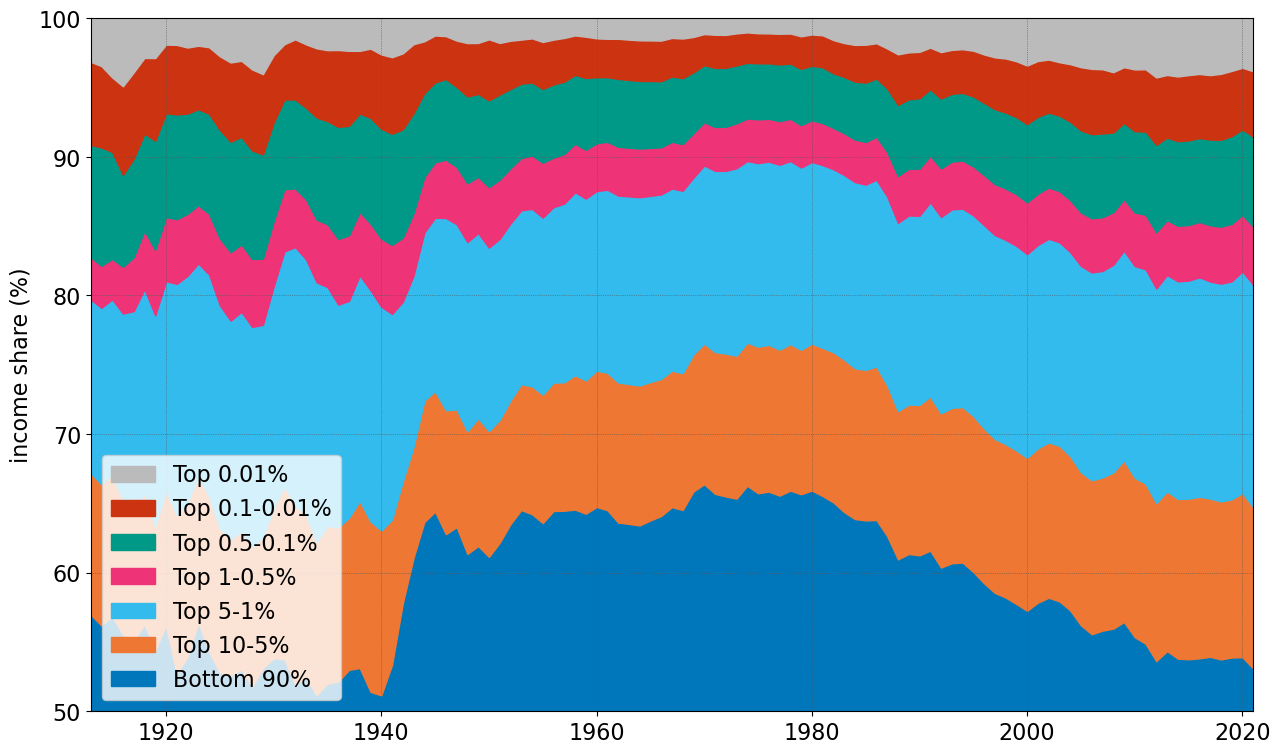

In [24]:
import matplotlib.patches as mpatches

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1913,2021], 'ylim': [50,100],
         'xlabel': '', 'ylabel': 'income share (%)',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,100]}

fig,ax = ec.GenerateTSPlot(param)

names = ['p0p90','p95p100','p99p100','p99.5p100','p99.9p100','p99.99p100','p99.99p100']
long_names = ['Bottom 90%','Top 10-5%','Top 5-1%','Top 1-0.5%','Top 0.5-0.1%','Top 0.1-0.01%','Top 0.01%']
var_share = pre_tax_factor_income_share 
dates = var_share[var_share['percentile'] == names[0]]['year'].to_numpy()
cumval = var_share[var_share['percentile'] == names[0]]['value'].to_numpy() * 0

legend_patches = []
for ind,name in enumerate(names):
    print(f'Share: {name}, years {var_share[var_share["percentile"] == name]["year"].min()}-{var_share[var_share["percentile"] == name]["year"].max()} ')
    if (ind == 0):
        cumvalinc = var_share[var_share['percentile'] == name]['value'].to_numpy()*100
    elif (ind < len(names)-1):
        cumvalinc = 100 - var_share[var_share['percentile'] == name]['value'].to_numpy()*100
    else:
        cumvalinc = 0*cumval + 100

    # cumvalinc = cumval + var_share[var_share['percentile'] == name]['value'].to_numpy()*100
    ax.fill_between(dates,cumval,cumvalinc,color=ec.clist_vibrant[ind])
    cumval = cumvalinc
    legend_patches.append(mpatches.Patch(color=ec.clist_vibrant[ind],label=long_names[ind]))

ax.legend(handles=(legend_patches[-1::-1]),loc='lower left');


### After-tax income shares

Share: p0p90, years 1913-2021 
Share: p95p100, years 1913-2021 
Share: p99p100, years 1913-2021 
Share: p99.5p100, years 1913-2021 
Share: p99.9p100, years 1913-2021 
Share: p99.99p100, years 1913-2021 
Share: p99.99p100, years 1913-2021 


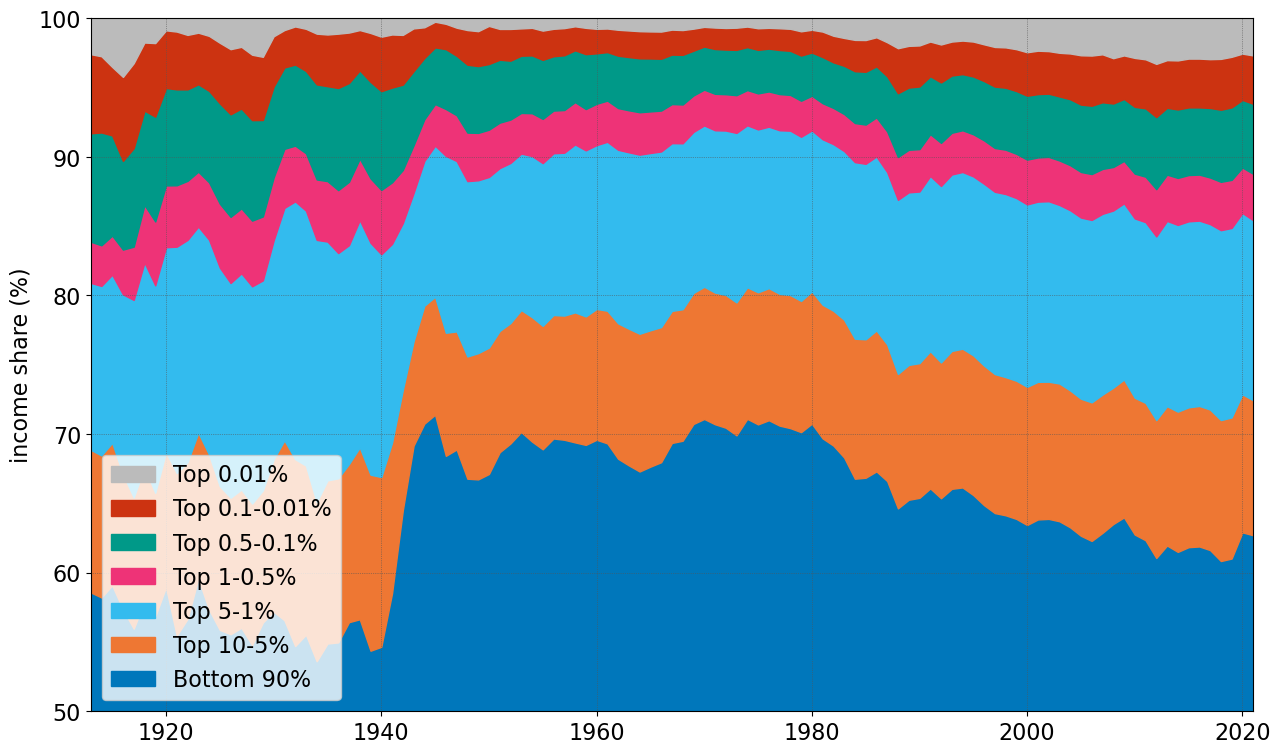

In [25]:
import matplotlib.patches as mpatches

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1913,2021], 'ylim': [50,100],
         'xlabel': '', 'ylabel': 'income share (%)',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,100]}

fig,ax = ec.GenerateTSPlot(param)

names = ['p0p90','p95p100','p99p100','p99.5p100','p99.9p100','p99.99p100','p99.99p100']
long_names = ['Bottom 90%','Top 10-5%','Top 5-1%','Top 1-0.5%','Top 0.5-0.1%','Top 0.1-0.01%','Top 0.01%']
var_share = post_tax_nat_income_share 
dates = var_share[var_share['percentile'] == names[0]]['year'].to_numpy()
cumval = var_share[var_share['percentile'] == names[0]]['value'].to_numpy() * 0

legend_patches = []
for ind,name in enumerate(names):
    print(f'Share: {name}, years {var_share[var_share["percentile"] == name]["year"].min()}-{var_share[var_share["percentile"] == name]["year"].max()} ')
    if (ind == 0):
        cumvalinc = var_share[var_share['percentile'] == name]['value'].to_numpy()*100
    elif (ind < len(names)-1):
        cumvalinc = 100 - var_share[var_share['percentile'] == name]['value'].to_numpy()*100
    else:
        cumvalinc = 0*cumval + 100

    # cumvalinc = cumval + var_share[var_share['percentile'] == name]['value'].to_numpy()*100
    ax.fill_between(dates,cumval,cumvalinc,color=ec.clist_vibrant[ind])
    cumval = cumvalinc
    legend_patches.append(mpatches.Patch(color=ec.clist_vibrant[ind],label=long_names[ind]))

ax.legend(handles=(legend_patches[-1::-1]),loc='lower left');

### Comparison of pre-tax and after-tax top income shares

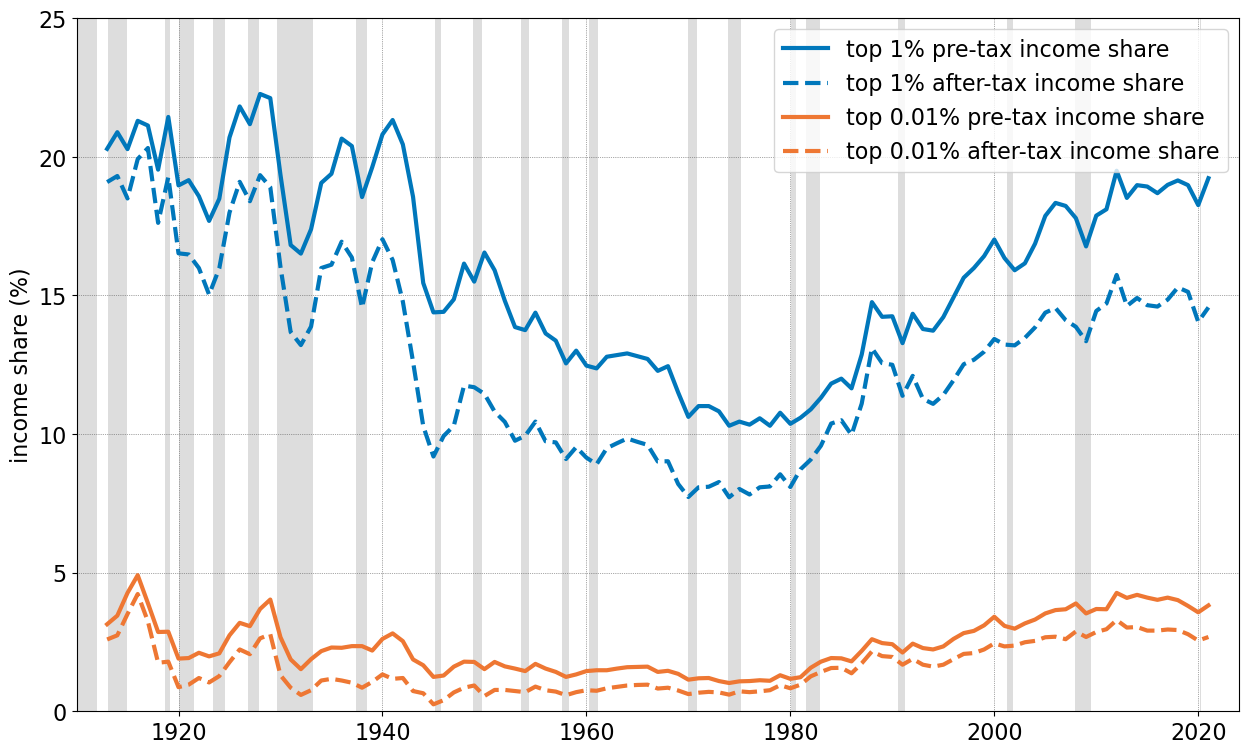

In [26]:
param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1910,2024], 'ylim': [0,25],
         'xlabel': '', 'ylabel': 'income share (%)',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,100]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(pre_tax_share_99['year'],pre_tax_share_99['value']*100,
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='top 1% pre-tax income share')
ax.plot(post_tax_share_99['year'],post_tax_share_99['value']*100,
                    linewidth=3,linestyle='--',marker='',color=ec.tolColor['tolVibrantBlue'],label='top 1% after-tax income share')
ax.plot(pre_tax_share_9999['year'],pre_tax_share_9999['value']*100,
                    linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='top 0.01% pre-tax income share')
ax.plot(post_tax_share_9999['year'],post_tax_share_9999['value']*100,
                    linewidth=3,linestyle='--',marker='',color=ec.tolColor['tolVibrantOrange'],label='top 0.01% after-tax income share')
x = ax.legend(loc='upper right')

### Income composition at the top

In [27]:
# wages and pensions share
income_share_wages = data_ineq_US[data_ineq_US['variable'] == 'sfiwagt992']
# entrepreneurial income
income_share_business = data_ineq_US[data_ineq_US['variable'] == 'sfimixt992']
# dividend share
income_share_dividends = data_ineq_US[data_ineq_US['variable'] == 'sfidivt992']
# interest
income_share_interest = data_ineq_US[data_ineq_US['variable'] == 'sfiintt992']
# rents
income_share_rents = data_ineq_US[data_ineq_US['variable'] == 'sfirent992']

print(f'Years: {income_share_wages["year"].min()}-{income_share_wages["year"].max()}')
print(f'Available percentiles: {income_share_wages["percentile"].unique()}')

Years: 1913-2019
Available percentiles: ['p0p50' 'p0p90' 'p50p90' 'p90p100' 'p95p100' 'p99.5p100' 'p99.99p100'
 'p99.9p100' 'p99p100']


#### Income composition for top 10%

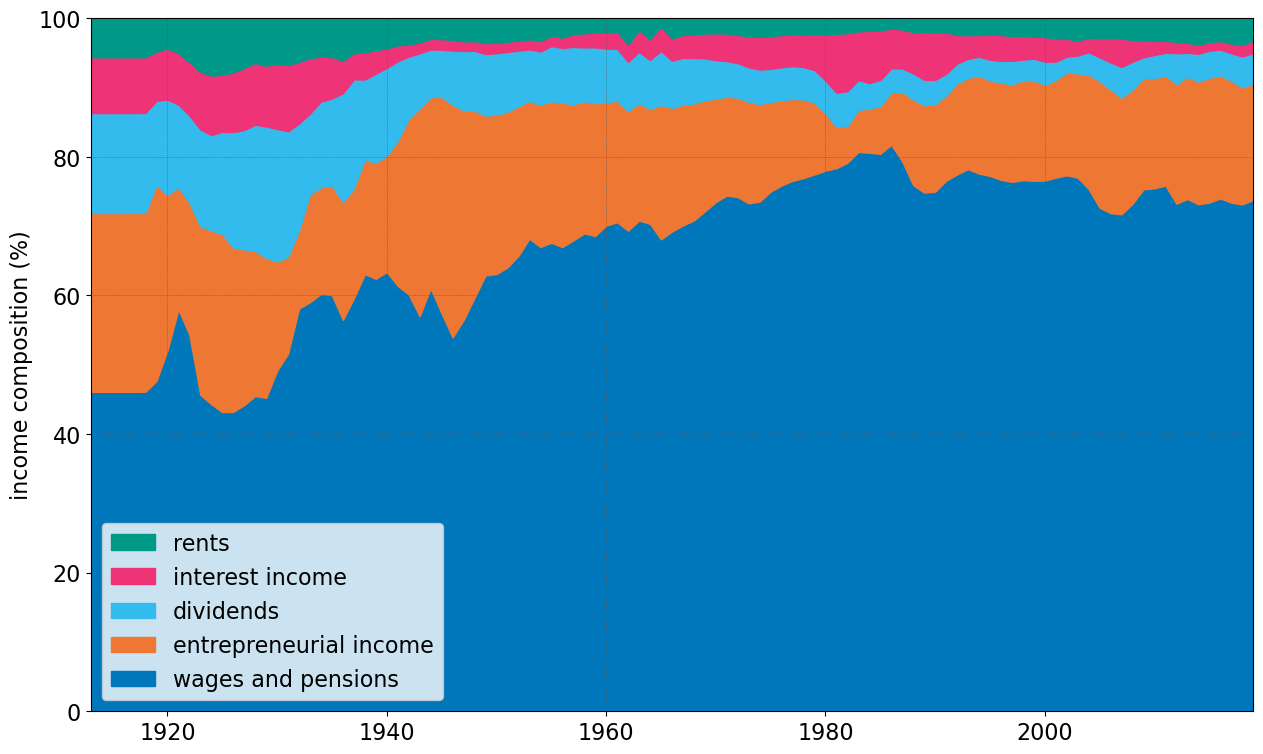

In [28]:
import matplotlib.patches as mpatches

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1913,2019], 'ylim': [0,100],
         'xlabel': '', 'ylabel': 'income composition (%)',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,100]}

fig,ax = ec.GenerateTSPlot(param)

percentile = 'p90p100'

data = [income_share_wages[income_share_wages['percentile'] == percentile]['value'].to_numpy()*100,
        income_share_business[income_share_business['percentile'] == percentile]['value'].to_numpy()*100,
        income_share_dividends[income_share_dividends['percentile'] == percentile]['value'].to_numpy()*100,
        income_share_interest[income_share_interest['percentile'] == percentile]['value'].to_numpy()*100,
        income_share_rents[income_share_rents['percentile'] == percentile]['value'].to_numpy()*100]

data = data/sum(data)*100

long_names = ['wages and pensions','entrepreneurial income','dividends','interest income','rents']
dates = income_share_wages[income_share_wages['percentile'] == percentile]['year'].to_numpy()
cumval = data[0]*0

legend_patches = []
for ind in range(len(data)):
    cumvalinc = cumval + data[ind]
    ax.fill_between(dates,cumval,cumvalinc,color=ec.clist_vibrant[ind])
    cumval = cumvalinc
    legend_patches.append(mpatches.Patch(color=ec.clist_vibrant[ind],label=long_names[ind]))

handles, labels = plt.gca().get_legend_handles_labels()
ax.legend(handles=legend_patches[-1::-1],loc='lower left');

#### Income composition for top 0.01%

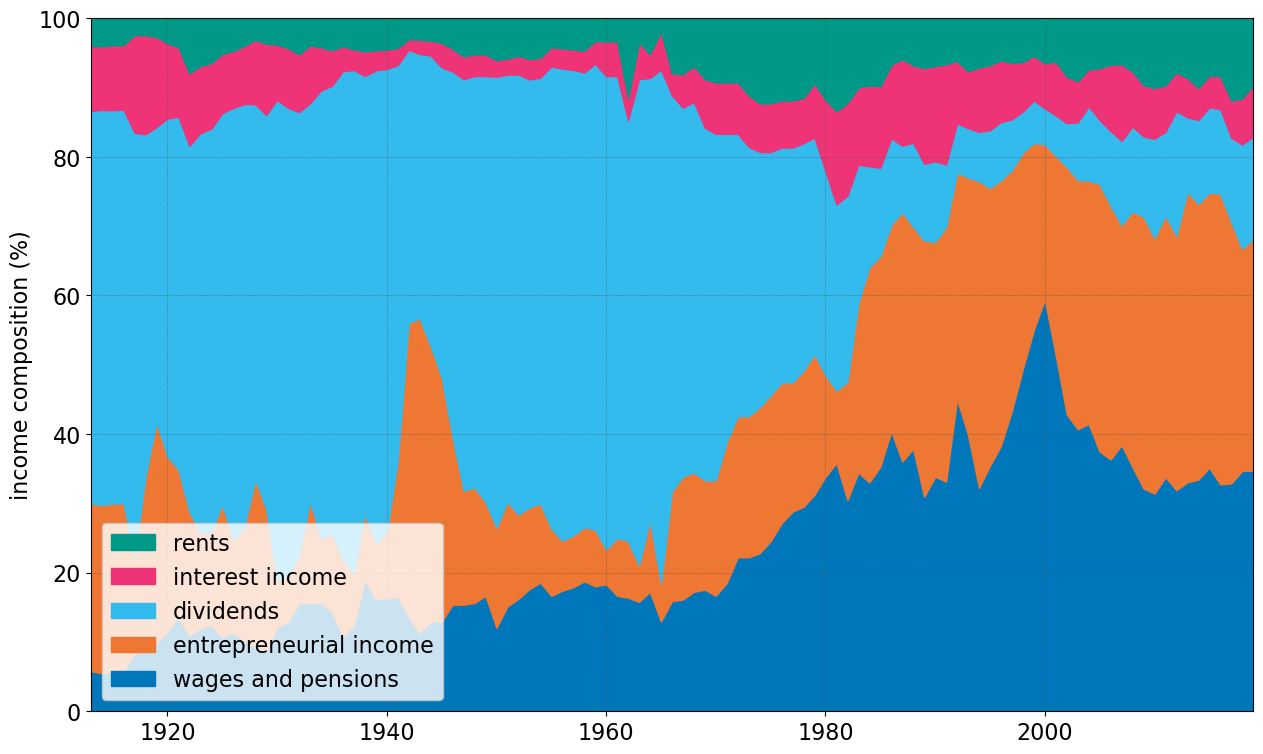

In [29]:
import matplotlib.patches as mpatches

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1913,2019], 'ylim': [0,100],
         'xlabel': '', 'ylabel': 'income composition (%)',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,100]}

fig,ax = ec.GenerateTSPlot(param)

percentile = 'p99.99p100'

data = [income_share_wages[income_share_wages['percentile'] == percentile]['value'].to_numpy()*100,
        income_share_business[income_share_business['percentile'] == percentile]['value'].to_numpy()*100,
        income_share_dividends[income_share_dividends['percentile'] == percentile]['value'].to_numpy()*100,
        income_share_interest[income_share_interest['percentile'] == percentile]['value'].to_numpy()*100,
        income_share_rents[income_share_rents['percentile'] == percentile]['value'].to_numpy()*100]

data = data/sum(data)*100

long_names = ['wages and pensions','entrepreneurial income','dividends','interest income','rents']
dates = income_share_wages[income_share_wages['percentile'] == percentile]['year'].to_numpy()
cumval = data[0]*0

legend_patches = []
for ind in range(len(data)):
    cumvalinc = cumval + data[ind]
    ax.fill_between(dates,cumval,cumvalinc,color=ec.clist_vibrant[ind])
    cumval = cumvalinc
    legend_patches.append(mpatches.Patch(color=ec.clist_vibrant[ind],label=long_names[ind]))

handles, labels = plt.gca().get_legend_handles_labels()
ax.legend(handles=legend_patches[-1::-1],loc='lower left');